<a href="https://colab.research.google.com/github/Shrawanthi06/DataAnalysis-Task7/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Basic Sales Summary by Product ===
    product  total_qty   revenue
0    Laptop          6  365000.0
1   Monitor          7   82000.0
2  Keyboard         11   17000.0
3     Mouse         30   15640.0


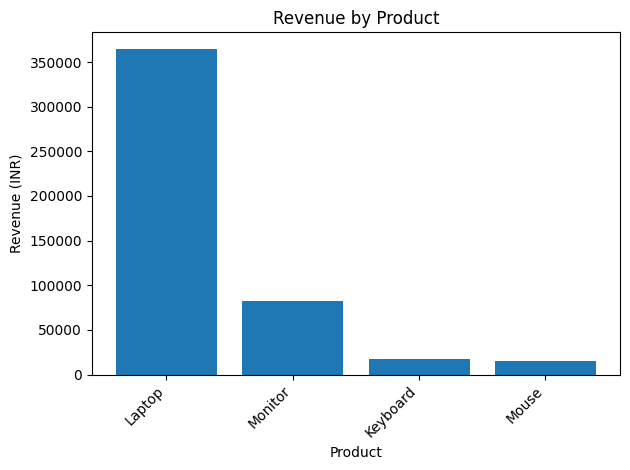

In [1]:
#Setup
import sqlite3, pandas as pd, matplotlib.pyplot as plt

#Create / connect to DB
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

#Create table
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  date TEXT NOT NULL,
  product TEXT NOT NULL,
  quantity INTEGER NOT NULL,
  price REAL NOT NULL
)
""")

#seed a tiny dataset if empty
cur.execute("SELECT COUNT(*) FROM sales")
if cur.fetchone()[0] == 0:
    cur.executemany(
        "INSERT INTO sales (date, product, quantity, price) VALUES (?, ?, ?, ?)",
        [
            ("2025-08-01","Laptop",2,60000.00),
            ("2025-08-01","Mouse",10,500.00),
            ("2025-08-02","Keyboard",6,1500.00),
            ("2025-08-02","Monitor",3,12000.00),
            ("2025-08-03","Laptop",1,62000.00),
            ("2025-08-03","Mouse",8,550.00),
            ("2025-08-04","Keyboard",5,1600.00),
            ("2025-08-04","Monitor",4,11500.00),
            ("2025-08-05","Laptop",3,61000.00),
            ("2025-08-05","Mouse",12,520.00),
        ]
    )
    conn.commit()

#Run SQL
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)

#Print results
print("=== Basic Sales Summary by Product ===")
print(df)

#Simple bar chart
plt.figure()
plt.bar(df["product"], df["revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

#Close
conn.close()
